### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Lab Questions

In [2]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [3]:
import numpy as np
from sklearn.metrics import classification_report

In [4]:
data = data[data != ' ?']

In [5]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [6]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [7]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [8]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [9]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [10]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [9]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Divorced,Married-AF-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# set Salary as the target value.
y = data['Salary']
X = data.drop(['Salary'], axis = 1)
# scale data
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Question 1:
What is the ratio of label 1 to label 0? (consider two significant digits)

In [12]:
data.shape

(32561, 26)

In [11]:
np.sum(data['Salary'])

7841

In [13]:
7841/(32561-7841)
#0.32

0.31719255663430423

#### Question 2: 
Consider the following scenario:
Government is securing a budget for low-income assistance programs. Assume this program will help low-income individuals/families with a fixed rate financial support. We need to have a good model to predict how many individuals/families are eligible for this assistance program. Beside accuracy which evaluation model should we use? 

```Python
' <=50K':0 - Negative
' >50K':1  - Positive```

#precision

#### Question 3 and 4:
Train a ``LogisticRegression`` model on this dataset. Set the hyper-parameters as follow: 
```Python
penalty = 'l1'
random_state = 0```
What is the train and test precision score? (with two significant digits) 

In [15]:

from sklearn.linear_model import LogisticRegression

c_range = [0.01, 0.1, 1, 10]
train_score_l1 = []
test_score_l1 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l1.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
#c=0.1

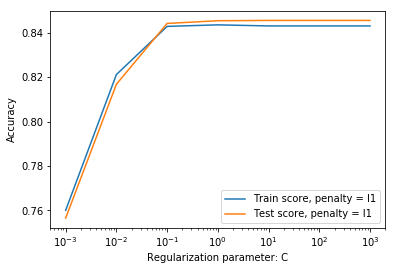

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
#0.1

In [118]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression().fit(X_train, y_train)

pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.842
Confusion matrix:
[[5726  433]
 [ 852 1130]]


In [119]:
1130/(1130+433)
#both   0.72

0.7229686500319897

#### Question 5 and 6:
Train a dummy classifier that classifies everything as the majority class of the training data. What are the train and test accuracy of this classifier? (numbers with two significant digits)

In [108]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))
#train 0.76
#test 0.76

Unique predicted labels: [0]
Test score: 0.76


#### Questions 7:
Train a ``LogisticRegression`` model on this dataset. Set the hyper-parameters as follow: 
```Python
penalty = 'l1'
random_state = 0``` 
What is the precision score when using a threshold of -2 on the decision function. Use ``X_test`` and ``y_test``. (2 significant digits)

In [84]:
#?a threshold of -2
log_l1 = LogisticRegression(C=0.1).fit(X_train, y_train)

In [105]:
y_pred_lower_threshold = log_l1.decision_function(X_test) >2

In [106]:
y_pred_lower_threshold

array([False, False, False, ..., False, False, False], dtype=bool)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lower_threshold))
#0.94

             precision    recall  f1-score   support

          0       0.76      1.00      0.87      6159
          1       0.94      0.04      0.08      1982

avg / total       0.81      0.77      0.67      8141



In [6]:
maxee([1 ,-2 ,-3 , 0, 4, 500 , 78])

500